In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
#load the dataset
df = pd.read_excel('heart_disease.xlsx' , sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
#shape
df.shape

(908, 13)

In [5]:
#find columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
#info abt dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
#checking data types
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [8]:
#checking null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
#converting boolean to integer
df['fbs'] = df['fbs'].astype(int)

In [11]:
#converting all object columns to strings
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str)

In [12]:
#Encoding categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [14]:
#feature extraction
x=df.drop(columns=['num'])
y = df['num'] #target

In [15]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,1,2.3,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.5,2,2
904,62,1,0,166,170,0,2,120,3,3.0,1,2
905,56,1,2,170,0,0,0,123,3,2.5,0,1
906,56,1,2,144,208,1,2,105,2,NaN,0,0


In [16]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [17]:
print("Features x shape :", x.shape)
print("Target y shape :", y.shape)

Features x shape : (908, 12)
Target y shape : (908,)


In [18]:
#splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((726, 12), (182, 12), (726,), (182,))

In [20]:
# Training the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
#Evaluating the model
y_pred = dt_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [25]:
print(f"\nAccuracy:{accuracy:.2f}")


Accuracy:0.51


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72        89
           1       0.39      0.46      0.42        48
           2       0.19      0.18      0.19        22
           3       0.29      0.24      0.26        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.51      0.51      0.51       182



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[63 17  5  2  2]
 [13 22  8  5  0]
 [ 6  7  4  3  2]
 [ 3  6  3  4  1]
 [ 0  5  1  0  0]]


In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

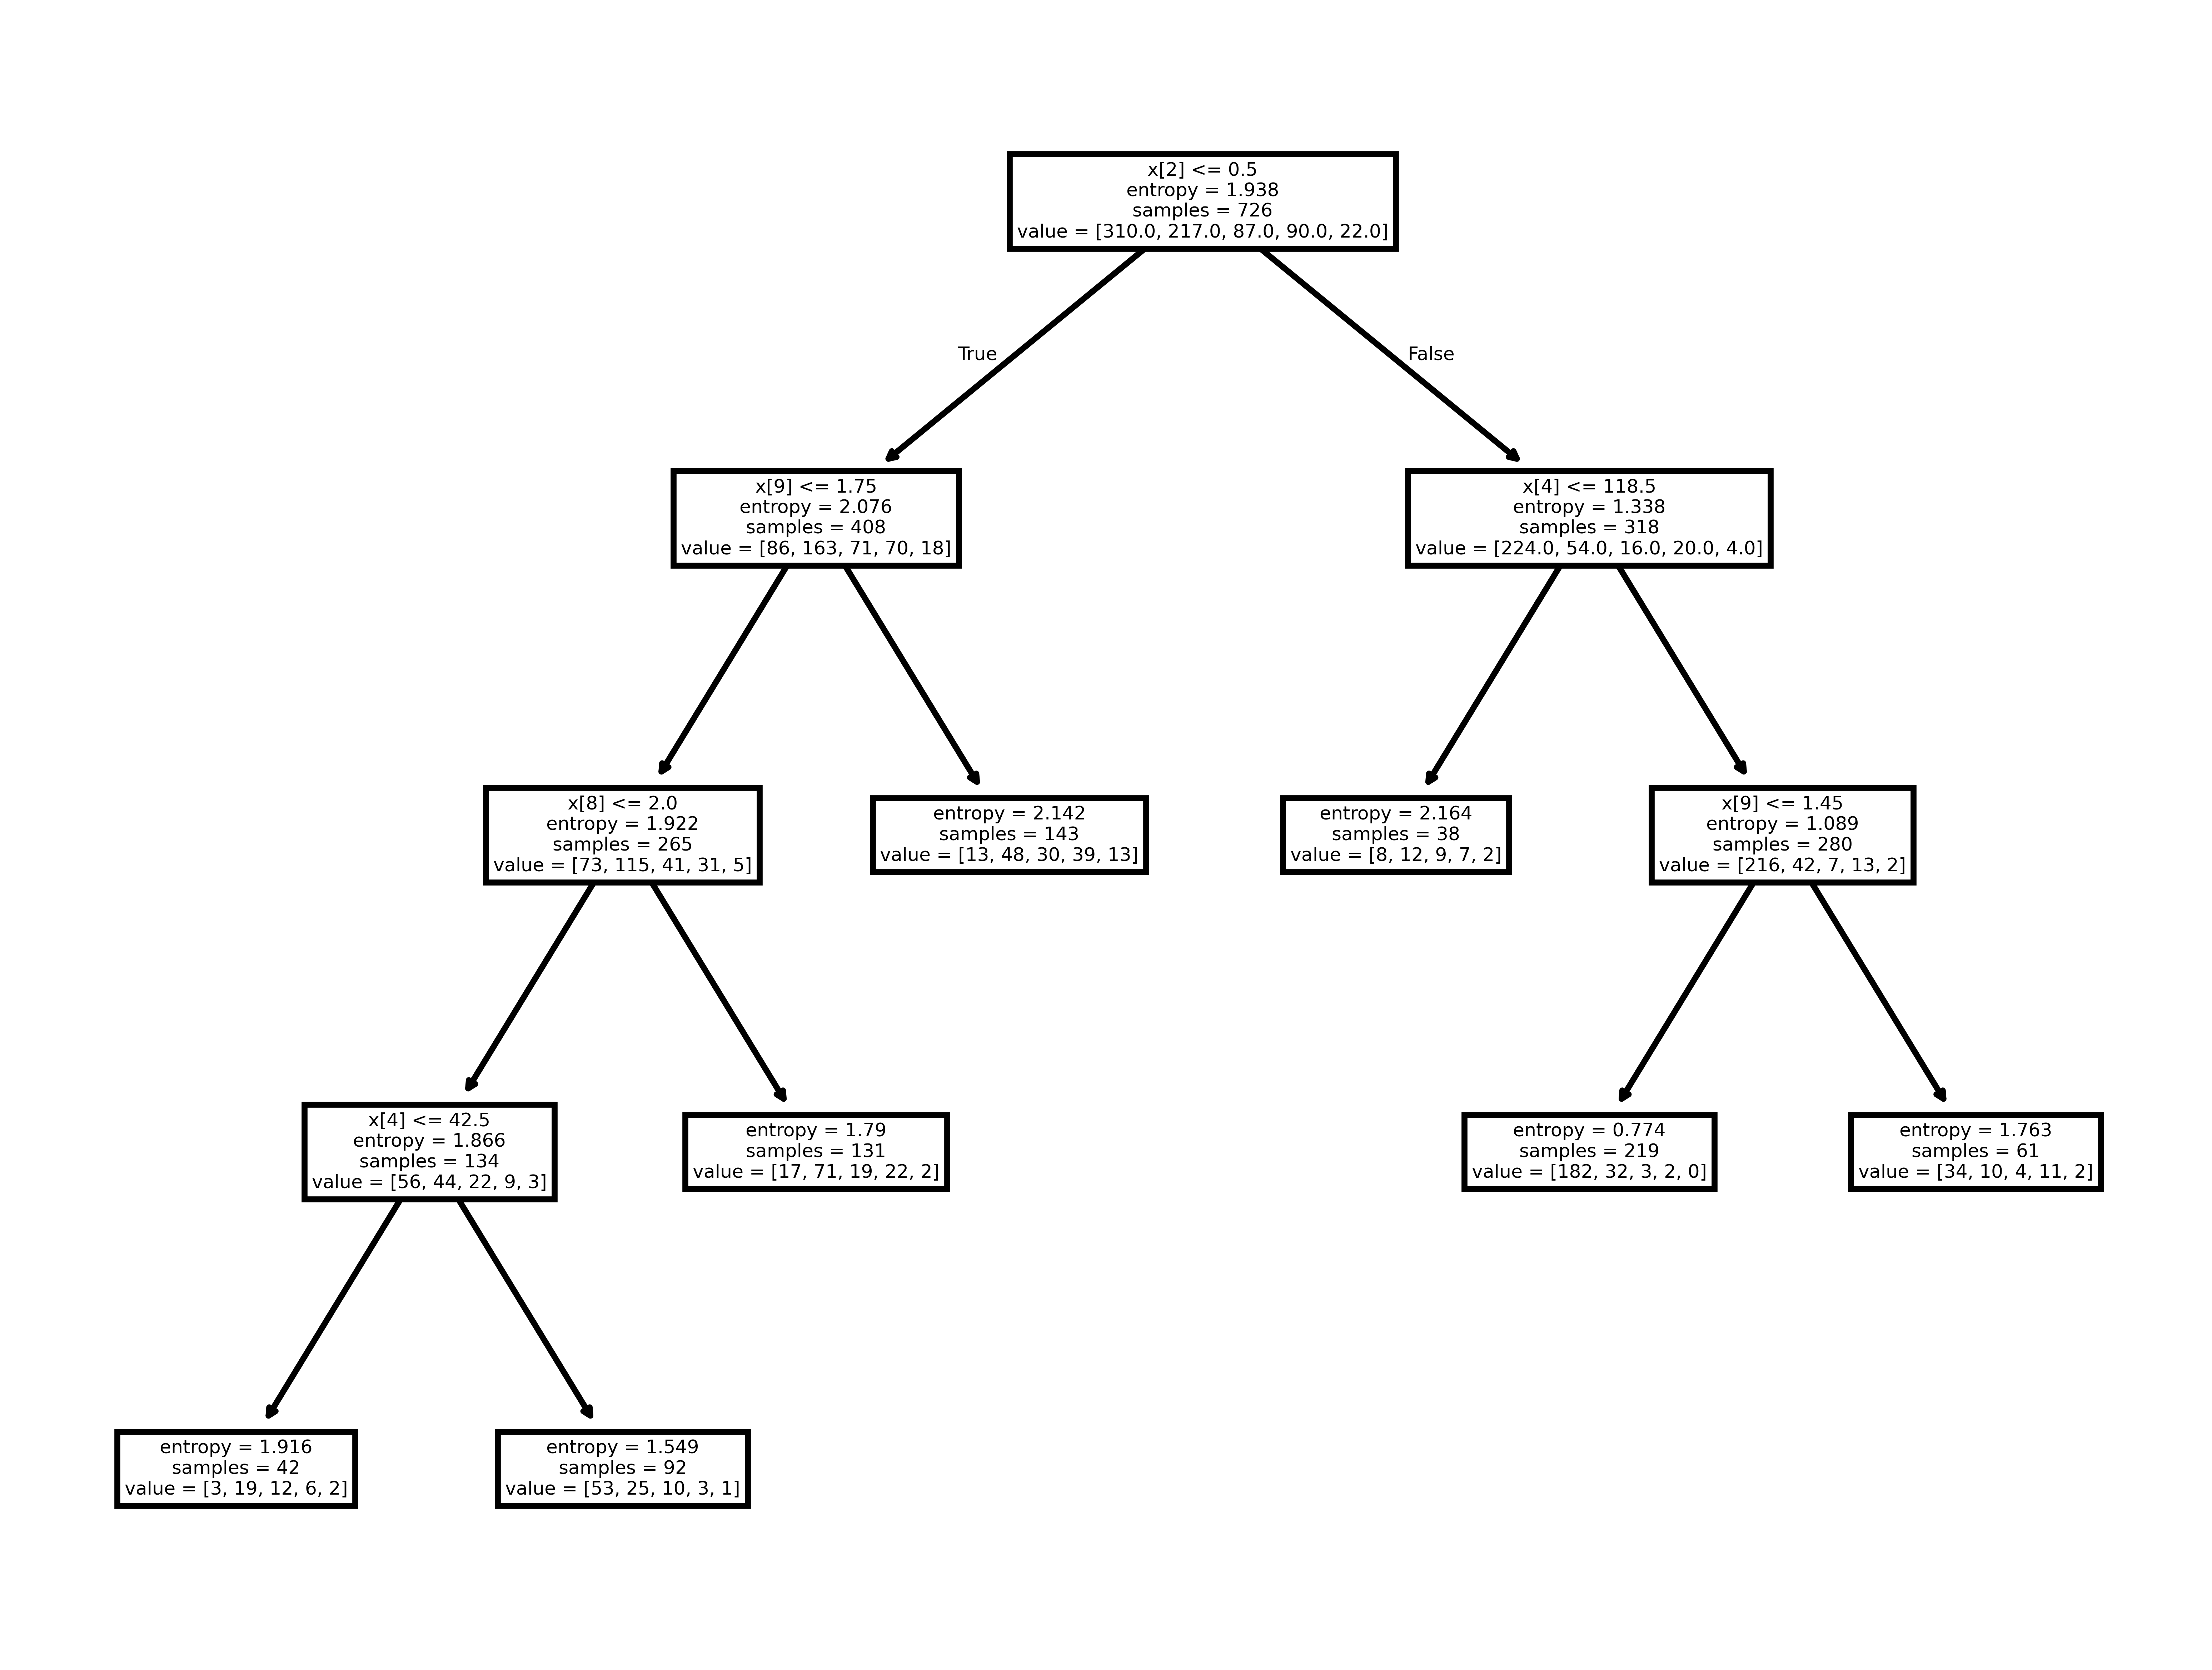

In [29]:
#plotting the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

In [31]:
#Predicting on test data
pred = model.predict(x_test) # predicting on test data set
pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0])

In [32]:
pd.Series(pred).value_counts() # getting the count of each category

,count
0,106
1,76


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        89
           1       0.38      0.60      0.47        48
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       182
   macro avg       0.22      0.29      0.25       182
weighted avg       0.45      0.58      0.50       182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Prediction on train data

pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       310
           1       0.42      0.69      0.53       217
           2       0.00      0.00      0.00        87
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00        22

    accuracy                           0.58       726
   macro avg       0.23      0.31      0.26       726
weighted avg       0.44      0.58      0.49       726



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
#both testing and training accuracy is 58%

**Interview Questions**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

1. Max Depth (max_depth)
Description: Limits the maximum depth of the tree.
Effect:
A shallow tree (low max_depth) may underfit the data because it cannot capture complex patterns.
A deep tree (high max_depth) may overfit the data by modeling noise and irrelevant details.
Ideal depth balances bias and variance.
2. Min Samples Split (min_samples_split)
Description: The minimum number of samples required to split an internal node.
Effect:
A high value prevents small splits, leading to simpler trees and reducing overfitting.
A low value allows splitting smaller subsets, which may lead to overfitting.
3. Min Samples Leaf (min_samples_leaf)
Description: The minimum number of samples required to be in a leaf node.
Effect:
Larger values force leaves to have more data, making the tree simpler and less prone to overfitting.
Smaller values allow smaller leaves, increasing the likelihood of overfitting.
4. Max Features (max_features)
Description: The maximum number of features considered for splitting at each node.
Effect:
Fewer features (lower values) can make the tree more robust and reduce overfitting, especially in high-dimensional data.
Using all features may capture more patterns but could lead to overfitting.
5. Max Leaf Nodes (max_leaf_nodes)
Description: Limits the number of leaf nodes in the tree.
Effect:
Fewer leaf nodes simplify the tree and reduce overfitting.
Unlimited leaf nodes may lead to overfitting, especially with noisy data.
6. Criterion (criterion)
Description: The metric used to measure the quality of a split (e.g., "gini" or "entropy" for classification, "squared_error" for regression).
Effect:
Choosing the right criterion can slightly affect the model’s accuracy, but the impact is often small.
For example, "gini" is faster to compute than "entropy" but may lead to slightly different splits.
7. Splitter (splitter)
Description: Strategy used to choose the split at each node (e.g., "best" for the best split, "random" for a random split).
Effect:
"Best" can lead to more accurate trees but may take longer to train.
"Random" is faster but might produce less accurate splits, potentially reducing performance.
8. Class Weight (class_weight)
Description: Assigns weights to different classes to handle class imbalance.
Effect:
Helps the tree focus more on minority classes, improving performance on imbalanced datasets.
Without balancing, the model may be biased toward the majority class.
9. Max Samples (max_samples, for ensembles)
Description: The fraction or number of samples used to fit each base learner in ensemble methods like Random Forest.
Effect:
Lower values introduce randomness and reduce overfitting in ensemble models.
Using all samples may make the ensemble less diverse and prone to overfitting.

**2. What is the difference between the Label encoding and One-hot encoding?**

**Label Encoding :** Assigns a unique integer to each category in the dataset.

For a categorical feature with
𝑛
n unique values, each value is replaced with an integer from
0
0 to
𝑛
−
1
n−1.

Example:
Categories: ["Red", "Green", "Blue"]


Single integer per category

Ordinal data, Low memory usage

Encoded: [0, 1, 2]

**One-hot Encoding :** Converts each category into a binary vector with a separate column for each unique category. A value of 1 indicates the presence of the category, and 0 indicates its absence.

For a categorical feature with
𝑛
n unique values, it creates
𝑛
n binary columns.

Example:
Categories: ["Red", "Green", "Blue"]

Encoded:
Red:   [1, 0, 0]
Green: [0, 1, 0]
Blue:  [0, 0, 1]

Binary vector for each category

Nominal data, High memory usage for many categories